### Understand Random Forest Algorithms With Examples (Updated 2023)
##### Random Forest Classifier Example with GridSearchCV
- https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import the dataset

In [3]:
dataset = pd.read_csv('../Dataset/heart.txt')
dataset

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


#### Putting Feature Variable to X and Target variable to y.

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

####  Train-Test-Split is performed

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

#### import RandomForestClassifier and fit the data.

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier_rg = RandomForestClassifier(n_estimators = 100,       
                                      n_jobs= 1,
                                      max_depth=5,
                                      oob_score=True,
                                      random_state=42
                                    )

classifier_rg.fit(X_train, y_train)

'''
Hyperparameters to Increase the Predictive Power:
----------------------------------------------------
- n_estimators: Number of trees the algorithm builds before averaging the predictions.

- max_features: Maximum number of features random forest considers splitting a node.
- mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.
- criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)
- max_leaf_nodes: Maximum leaf nodes in each tree


Hyperparameters to Increase the Speed:
-------------------------------------------
- n_jobs: it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.
- random_state: controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and has been given the same        hyperparameters and training data.
- oob_score: OOB means out of the bag. It is a random forest cross-validation method. In this, one-third of the sample is not used to train the data; instead used to evaluate its performance. These samples are called out-of-bag samples.
'''

'\nHyperparameters to Increase the Predictive Power:\n----------------------------------------------------\n- n_estimators: Number of trees the algorithm builds before averaging the predictions.\n\n- max_features: Maximum number of features random forest considers splitting a node.\n- mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.\n- criterion: How to split the node in each tree? (Entropy/Gini impurity/Log Loss)\n- max_leaf_nodes: Maximum leaf nodes in each tree\n\n\nHyperparameters to Increase the Speed:\n-------------------------------------------\n- n_jobs: it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.\n- random_state: controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and has been given the same        hyperparameters and training data.\n- oob_score: OOB m

In [11]:
classifier_rg.oob_score_

0.656084656084656

#### hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [12]:
rf = RandomForestClassifier(n_jobs=1, random_state=42)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator= rf, 
                           param_grid = params, 
                           cv = 4, 
                           verbose= 1,
                           scoring= 'accuracy')

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=1, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [16]:
grid_search.best_score_

0.6985815602836879

In [18]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=1, random_state=42)

#### Visualize the results

[Text(0.6, 0.9166666666666666, 'cholestrol <= 301.0\ngini = 0.5\nsamples = 114\nvalue = [97, 92]\nclass = Disease'),
 Text(0.5, 0.75, 'age <= 54.5\ngini = 0.498\nsamples = 99\nvalue = [77, 86]\nclass = No Disease'),
 Text(0.2, 0.5833333333333334, 'sex <= 0.5\ngini = 0.447\nsamples = 51\nvalue = [55, 28]\nclass = Disease'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 14\nvalue = [24, 0]\nclass = Disease'),
 Text(0.3, 0.4166666666666667, 'age <= 48.5\ngini = 0.499\nsamples = 37\nvalue = [31, 28]\nclass = Disease'),
 Text(0.2, 0.25, 'cholestrol <= 230.0\ngini = 0.48\nsamples = 21\nvalue = [14, 21]\nclass = No Disease'),
 Text(0.1, 0.08333333333333333, 'gini = 0.465\nsamples = 11\nvalue = [7, 12]\nclass = No Disease'),
 Text(0.3, 0.08333333333333333, 'gini = 0.492\nsamples = 10\nvalue = [7, 9]\nclass = No Disease'),
 Text(0.4, 0.25, 'gini = 0.413\nsamples = 16\nvalue = [17, 7]\nclass = Disease'),
 Text(0.8, 0.5833333333333334, 'age <= 61.5\ngini = 0.399\nsamples = 48\nvalue = [22

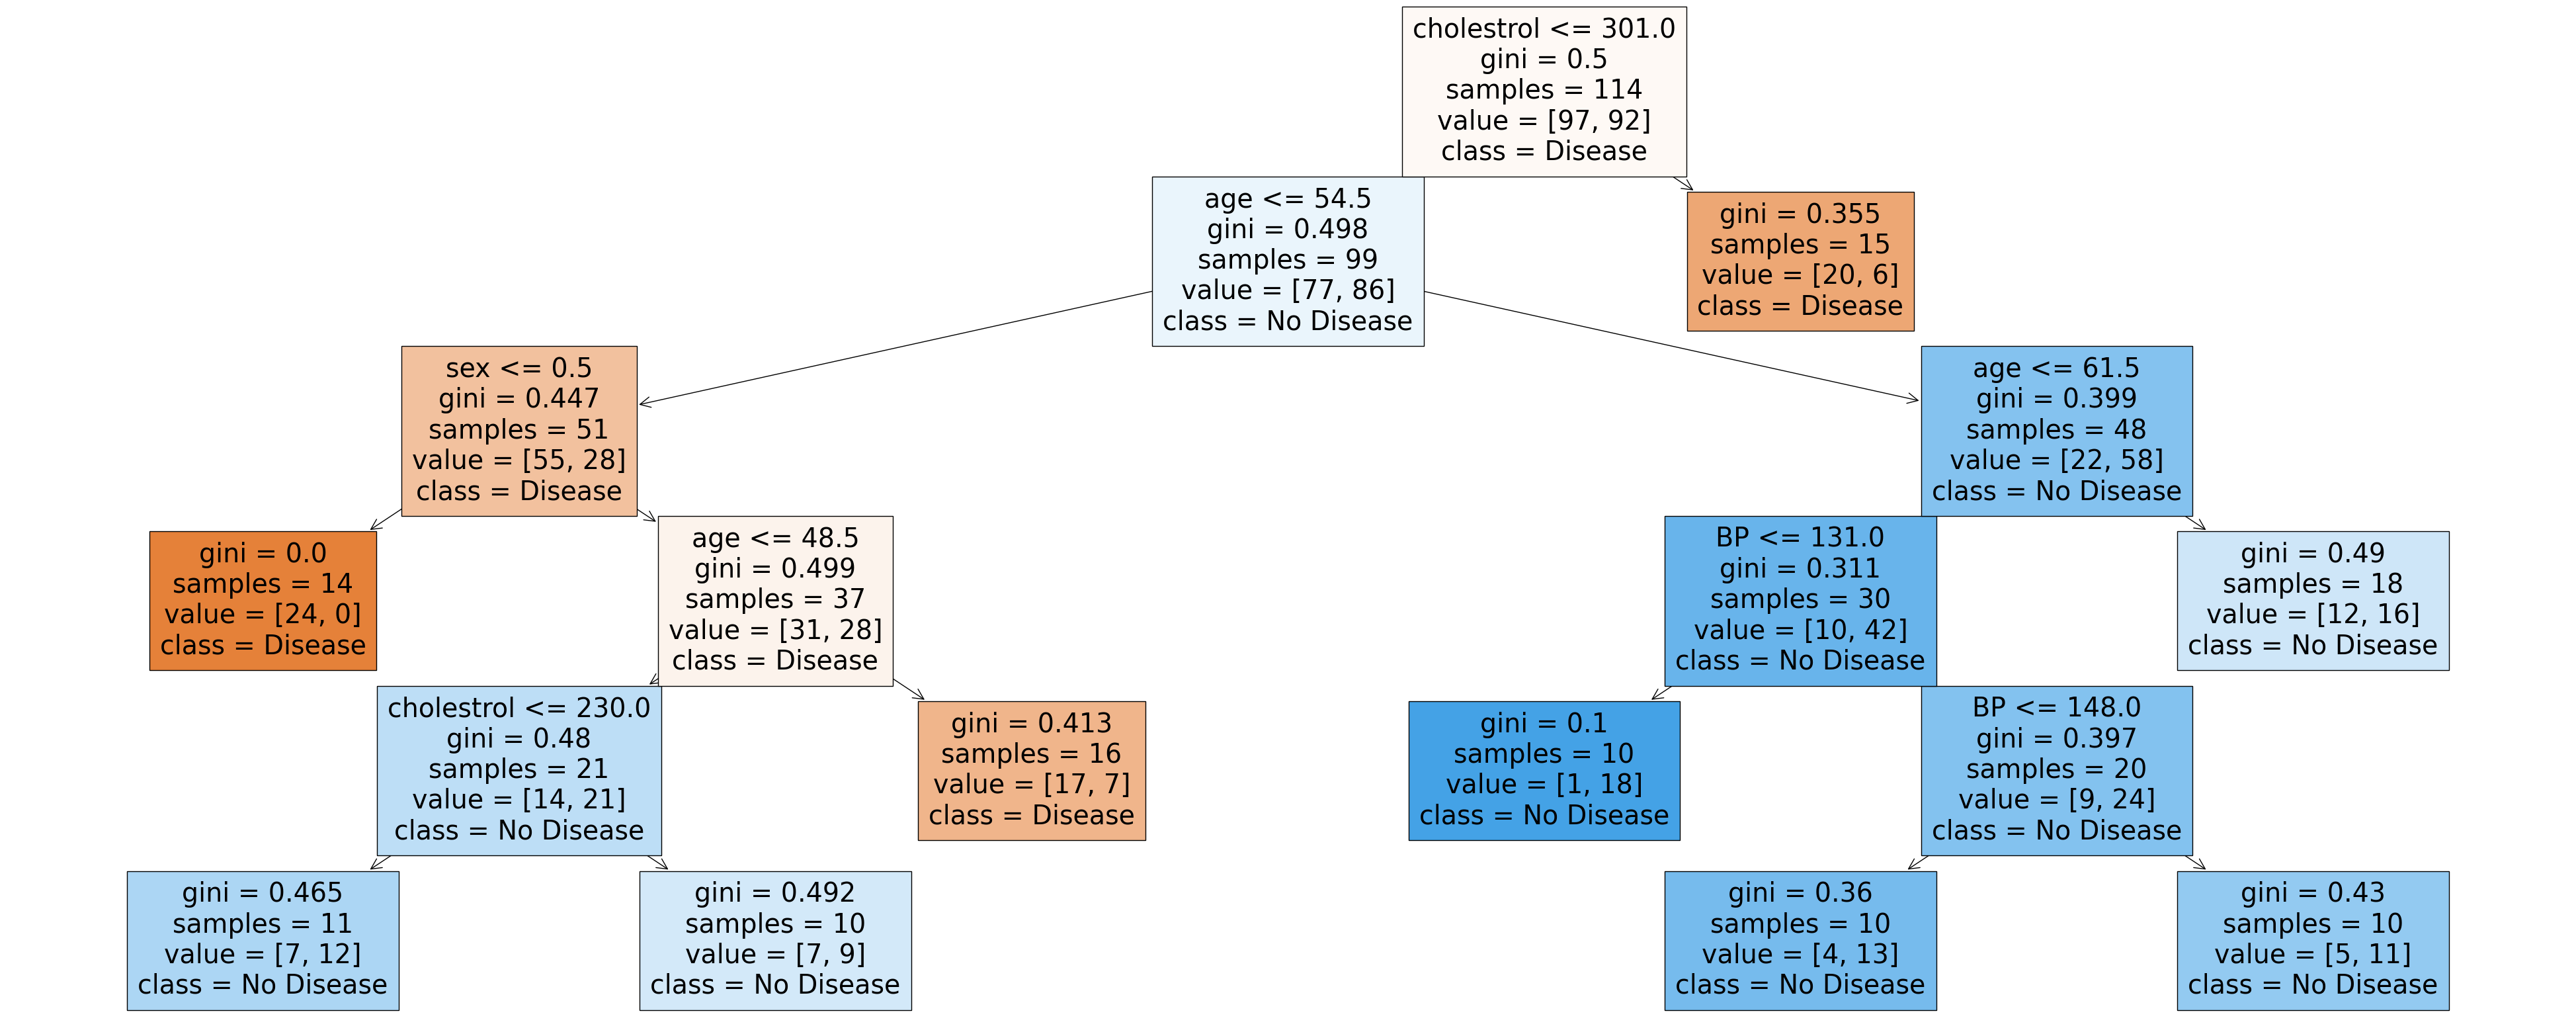

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(rf_best.estimators_[5], feature_names = dataset.columns, class_names= ['Disease', 'No Disease'] ,filled = True)

[Text(0.4375, 0.9, 'age <= 54.5\ngini = 0.496\nsamples = 122\nvalue = [103, 86]\nclass = Disease'),
 Text(0.1875, 0.7, 'sex <= 0.5\ngini = 0.395\nsamples = 55\nvalue = [62, 23]\nclass = Disease'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [19, 0]\nclass = Disease'),
 Text(0.25, 0.5, 'BP <= 127.0\ngini = 0.454\nsamples = 42\nvalue = [43, 23]\nclass = Disease'),
 Text(0.125, 0.3, 'BP <= 115.0\ngini = 0.49\nsamples = 20\nvalue = [16, 12]\nclass = Disease'),
 Text(0.0625, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.1875, 0.1, 'gini = 0.49\nsamples = 10\nvalue = [8, 6]\nclass = Disease'),
 Text(0.375, 0.3, 'cholestrol <= 243.5\ngini = 0.411\nsamples = 22\nvalue = [27, 11]\nclass = Disease'),
 Text(0.3125, 0.1, 'gini = 0.48\nsamples = 12\nvalue = [12, 8]\nclass = Disease'),
 Text(0.4375, 0.1, 'gini = 0.278\nsamples = 10\nvalue = [15, 3]\nclass = Disease'),
 Text(0.6875, 0.7, 'sex <= 0.5\ngini = 0.478\nsamples = 67\nvalue = [41, 63]\nclass = No Disea

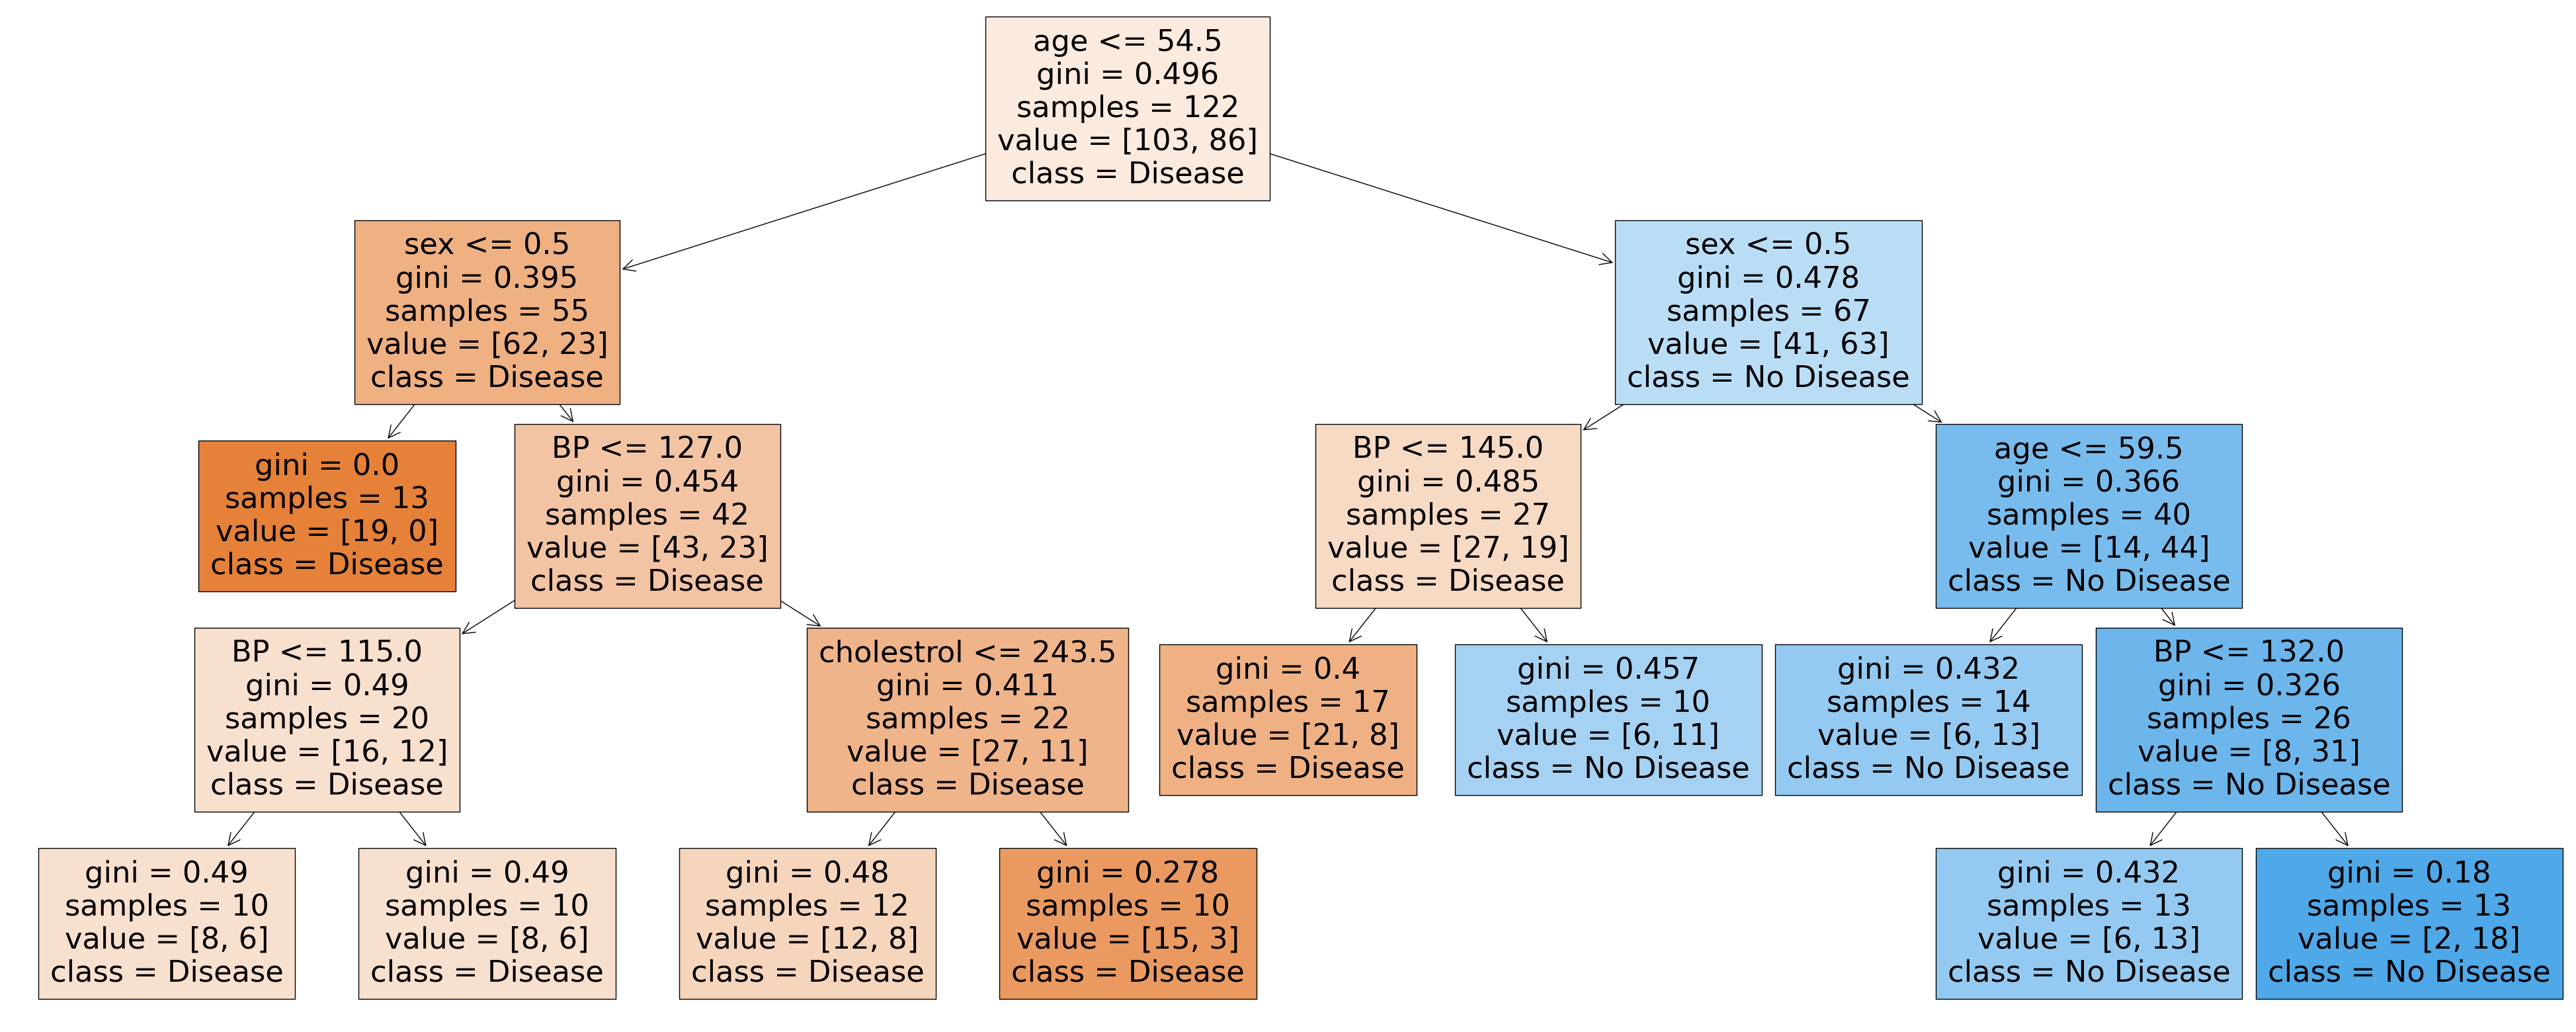

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(rf_best.estimators_[7], feature_names = dataset.columns, class_names= ['Disease', 'No Disease'] ,filled = True)

#### sort the data with the help of feature importance

In [48]:
dataset.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [30]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [62]:
important_features_dict = {}
for idx, val in enumerate(rf_best.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: [0, 1, 3, 2]


##### 0 => age
##### 1 => sex
##### 3 => cholestrol
##### 2 => BP


In [67]:
# Another way to find the most important features

importances = rf_best.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

sorted_indices

array([0, 1, 3, 2], dtype=int64)